Cuaderno de trabajo de:
 - _Piloto_ : Nombre1 Apellido1 (username con el que os habéis logueado)
 - _Copiloto_ : Nombre2 Apellido2 [escribe el username2]

In [1]:
%matplotlib inline
import random
import numpy as np
import scipy as sc
import scipy.stats as st

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from plot_prob import plot_multinormal

## Distribuciones de probabilidad continuas multi-dimensionales

En una distribución de probabilidad **continua multi-dimensional**, el resultado de una extracción aleatoria son **varios números reales**. Por ejemplo, podemos medir el par de variables (E, P) = (eslora, peso de un barco).
    
Si miramos cada variable por separado, es posible que E y P sigan una distribución normal, pero la información más interesante sólo es accesible si observamos las dos variables simultáneamente para el mismo barco. La relación entre las variables puede ser más interesante que la distribución de cada variable por separado.

### Motivación: a mayor peso, mayor consumo

En esta gráfica se carga un fichero de datos de 32 coches, y se muestran  un **scatter plot** de *miles per gallon* contra *peso*:
 - Cada punto es un modelo de coche:
    - La coordenada x es su peso (wt: weight)
    - La coordenada y es el consumo (mpg: miles per gallon)

<AxesSubplot:xlabel='wt', ylabel='mpg'>

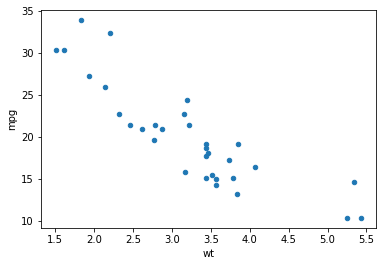

In [2]:
#No os preocupéis (por ahora) por este código, lo explicaremos pronto
mtcars=pd.read_csv('mtcars.csv')
mtcars.plot.scatter(y = 'mpg', x = 'wt')

Es fácil conjeturar mirando los datos que *"a mayor peso, menos millas por cada galón de combustible (es decir, mayor consumo)"*.

Sin embargo, mirando a cada variable por separado, es imposible sacar esa conclusión.

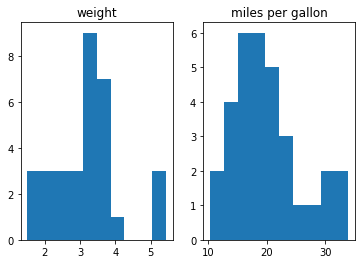

In [3]:
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].hist(mtcars['wt'])
axs[0].set_title('weight')
axs[1].hist(mtcars['mpg'])
axs[1].set_title('miles per gallon')
plt.show()

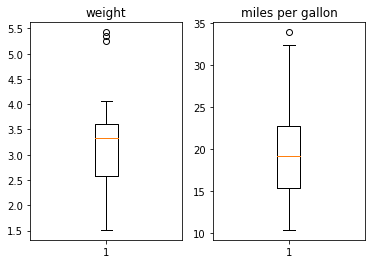

In [4]:
#Usar otro tipo de gráfica tampoco ayuda
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].boxplot(mtcars['wt'])
axs[0].set_title('weight')
axs[1].boxplot(mtcars['mpg'])
axs[1].set_title('miles per gallon')
plt.show()

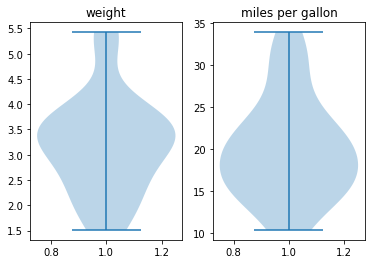

In [5]:
#Usar otro tipo de gráfica tampoco ayuda
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].violinplot(mtcars['wt'])
axs[0].set_title('weight')
axs[1].violinplot(mtcars['mpg'])
axs[1].set_title('miles per gallon')
plt.show()

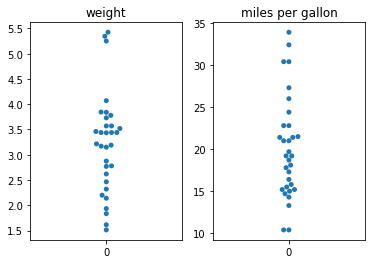

In [6]:
#Usar otro tipo de gráfica tampoco ayuda
fig, axs = plt.subplots(nrows=1, ncols=2)
sns.swarmplot(data=mtcars['wt'], ax=axs[0])
axs[0].set_title('weight')
sns.swarmplot(data=mtcars['mpg'], ax=axs[1])
axs[1].set_title('miles per gallon')
plt.show()

## Función de densidad 2D

La **función de densidad** de una distribución continua 2D es una función  de dos variables $x,y$ tal que, para $A\subset\mathbb{R}^2$:
$$
P((X,Y) \in A) = \int_A f(x,y)\;dx\;dy
$$
A veces se llama **función de densidad "conjunta"** para distinguirla de las *marginales* que veremos luego.

La distribución de probabilidad multi-dimensional contiene toda la información:
 - La distribución de probabilidad **marginal sobre X** es la distribución de las variables X por separado. Idem para la **marginal sobre Y**.
$$
P(X\in C) = P(X\in C, Y\in\mathbb{R})
= \int_{C\times\mathbb{R}} f(x,y)\;dx\;dy
= \int_C \left(\int_{\mathbb{R}}f(x,y)\;dy\right)dx
$$
$$
P(Y\in D) = P(X\in \mathbb{R}, Y\in D)
= \int_{\mathbb{R}\times D} f(x,y)\;dx\;dy
= \int_D \left(\int_{\mathbb{R}}f(x,y)\;dx\right)dy
$$
Luego tiene sentido definir la **densidad marginal de la variable X**:
$$
f_X(x) = \int_{\mathbb{R}}f(x,y)\;dy
$$
porque 
$$
P(X\in C) =
\int_C f_X(x)dx
$$

### Esperanza de una variable aleatoria continua 2D

Una VA 2D es un vector (X,Y). Podemos calcular la esperanza (promedio) de una cantidad real.

Por ejemplo
$$
E[X] = \int_{\mathbb{R}^2} x f(x,y)dxdy
$$
$$
E[Y] = \int_{\mathbb{R}^2} y f(x,y)dxdy
$$
$$
E[XY] = \int_{\mathbb{R}^2} xy f(x,y)dxdy
$$
En general
$$
E[g(X,Y)] = \int_{\mathbb{R}^2} g(x,y) f(x,y)dxdy
$$

 - La **media**, **desviación típica** o **varianza**  de cada variable depende sólo de la distribución marginal.
 
Por ejemplo:
$$
E[X] = \int_{\mathbb{R}^2} x f(x,y)dxdy = \int_{\mathbb{R}^2} x f_X(x)dx
$$

 - La **covarianza** y la **correlación** miden la interdependencia de dos variables, y *no se pueden calcular usando únicamente las marginales*:
    - La covarianza de $X$ e $Y$ es el valor medio de $(X-\mu_X)(Y-\mu_Y)$. Puede tomar cualquier valor. Sus *unidades* son el producto de las unidades de X por las de Y.
$$
Cov[X,Y] = E[(X-\mu_X)(Y-\mu_Y)] 
= E[XY-\mu_XY-X\mu_Y+\mu_X\mu_Y)] 
= E[XY]-\mu_X\mu_Y
$$
    - La correlación es el cociente de la covarianza por las desviaciones típicas de $X$ e $Y$:
$$
corr(X,Y) = \frac{cov(X,Y)}{std(X)std(Y)}
$$     
     Puede tomar valores entre 1 y -1. No tiene unidades, es *adimensional*.

Cuando tenemos una distribución de dimensión $n$, es habitual escribir todas las covarianzas en una matriz, que llamamos la *matriz de varianzas-covarianzas*, y es habitual representarla con la letra griega $\Sigma$.
$$
{\displaystyle \Sigma={\begin{bmatrix}
\operatorname{Cov}[X_1,X_1] & \operatorname{Cov}[X_1,X_2] & \dots & \operatorname{Cov}[X_1,X_n] \\
\operatorname{Cov}[X_2,X_1] & \operatorname{Cov}[X_2,X_2] & \dots & \operatorname{Cov}[X_2,X_n] \\
\vdots &\vdots &\ddots &\vdots \\
\operatorname{Cov}[X_n,X_1] & \operatorname{Cov}[X_n,X_2] & \dots & \operatorname{Cov}[X_n,X_n] \\
\end{bmatrix}}}
$$
Esta matriz siempre es *simétrica y definida positiva*.

### Ejemplo

 - Extraemos una muestra aleatoria de un experimento.
 - Dibujamos un scatter plot para entender la distribución.
 - Simulamos la media y la varianza de cada coordenada, usando siempre la misma muestra, como de costumbre.
 - Simulamos la covarianza, usando la misma muestra.

In [7]:
def experimento():
    x = random.random()
    y = x+random.random()
    return (x,y)

In [8]:
experimento()

(0.6557045441759519, 1.5530711632351148)

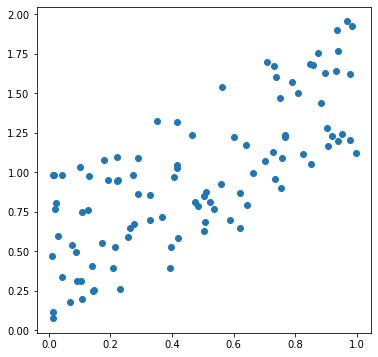

In [9]:
#Aumenta el tamaño de la muestra para hacerte una idea
#de qué distribución sigue el experimento
N = 100
muestra = np.array([experimento() for k in range(N)])
plt.figure(figsize=(6,6))
plt.scatter(muestra[:,0], muestra[:,1])

In [10]:
muestrax, muestray = muestra[:,0], muestra[:,1]
mediax, mediay = muestrax.mean(), muestray.mean()
mediax, mediay

(0.47519248005853887, 0.9678919729387752)

In [11]:
varx = sum(x**2 for x in muestrax)/N - mediax**2
vary = sum(y**2 for y in muestray)/N - mediay**2
#La siguiente línea es una alternativa más eficiente, usando
#las herramientas de numpy
#varx = (muestrax**2).mean() - mediax**2
varx, vary

(0.09936205915442659, 0.19564653420999967)

In [12]:
# Otra forma equivalente de calcular varx
varx = sum(x**2 for x,y in muestra)/N - mediax**2
varx

0.09936205915442659

En realidad, las variables $X$ e $Y$, por separado, no tienen mayor interés:
```python
def experimento():
    x = random.random()
    y = x+random.random()
    return (x,y)
```
Vemos que $X$ es una Uniforme(0,1), mientras que $Y$ es una suma de dos Uniforme(0,1) independientes. Pero lo realmente interesante es que $X$ e $Y$ no son independientes. Por ejemplo, su covarianza no es nula:

In [13]:
cov = sum((x-mediax)*(y-mediay) for x,y in muestra)/N
cov

0.10481620730672205

In [14]:
# Otra forma equivalente de calcular varx
# usando Cov(X,Y) = E[XY] - E[X]*E[Y]
cov = sum(x*y for x,y in muestra)/N - mediax*mediay
cov

0.10481620730672214

In [15]:
# Otra forma equivalente de calcular varx
# usando operaciones con arrays de numpy
cov = sum((muestrax - mediax)*(muestray - mediay))/N
#Ejercicio: ¿sabrías calcular esta covarianza de forma exacta?
cov

0.10481620730672205

La librería ``numpy`` puede calcular medias, varianzas y covarianzas con los métodos ``mean``, ``var`` y ``cov``, pero cuidado:

  - Cuando ``numpy.var`` calcula varianzas, usa la fórmula
$$
\frac{1}{n}\Sigma_{i=1}^n (x_i-\mu_X)^2
$$
  - Cuando ``numpy.cov`` calcula la *matriz de covarianzas*, usa la fórmula
$$
\frac{1}{n-1}\Sigma_{i=1}^n (x_i-\mu_X)^2
$$
y
$$
\operatorname{Cov}[X, Y] = \frac{1}{n-1}\Sigma_{i=1}^n (x_i-\mu_{X})(y_i-\mu_Y)
$$
El motivo es que de esta forma se obtiene un *"estimador insesgado"* de la covarianza, que es un tema que no vamos a tratar, pero debéis saber que a veces encontraréis el factor $\frac{1}{n-1}$ y a veces el factor $\frac{1}{n}$ al calcular varianzas y covarianzas, a veces incluso en la misma librería (sigh).

In [16]:
np.mean(muestra, axis=0)

array([0.47519248, 0.96789197])

In [17]:
np.var(muestra, axis=0)

array([0.09936206, 0.19564653])

In [18]:
#usa la ayuda para entender por que hace falta rowvar=False
np.cov(muestra, rowvar=False)#, bias=True)

array([[0.10036572, 0.10587496],
       [0.10587496, 0.19762276]])

In [19]:
# Ejecuta este código y observa las dimensiones de la matriz
# de covarianzas usando rowvar=True y rowvar=False
N = 10
muestra = np.array([experimento() for k in range(N)])
np.cov(muestra).shape, np.cov(muestra, rowvar=False).shape

((10, 10), (2, 2))

Si a ``np.cov`` le añadimos el argumento ``bias=True``, las varianzas y covarianzas se calculan con la fórmula:
$$
\operatorname{Cov}[X, Y] = \frac{1}{n}\Sigma_{i=1}^n (x_i-\mu_{X})(y_i-\mu_Y)
$$


In [20]:
np.cov(muestra, rowvar=False, bias=True)

array([[0.06377191, 0.0577049 ],
       [0.0577049 , 0.12781622]])

### Distribución uniforme multidimensional

Generaliza la distribución uniforme en un intervalo:

> Un proceso aleatorio que genera varios números reales $(X_1,\dots,X_p)$ sigue una distribución uniforme multi-dimensional soportada en un conjunto $A\subset\mathbb{R}^p$ si es continua con soporte $A$ y función de densidad:

$$
f(x)=\left\{\begin{array}{ll}
1/\operatorname{vol}(A) & \text{ si } x\in A \\
0 & \text{ en otro caso}
\end{array}
\right.
$$

En general, las variables $X_1$, $X_2$, ... $X_p$ no siguen una distribución uniforme.

### Ejercicio

Si $X$ e $Y$ son dos variables aleatorias continuas uniformes en el intervalo (-1,1) y son independientes: ¿cuál es la probabilidad de que $X^2 + Y^2 < 1$?

In [21]:
X = st.uniform(loc=-1, scale=2)
Y = st.uniform(loc=-1, scale=2)
def experimento():
    return (X.rvs(), Y.rvs())

random.seed(2)
N = 1000
muestraxy = [experimento() for _ in range(N)]

In [22]:
prob = sum(1 for x,y in muestraxy if x**2 + y**2 < 1)/N
print('', prob)

 0.786


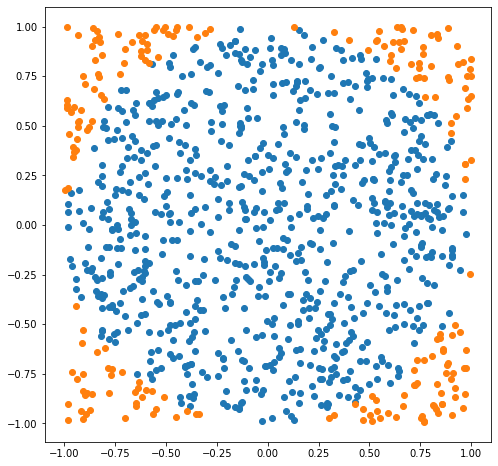

In [23]:
favorables = [(x,y) for (x,y) in muestraxy if x**2 + y**2 < 1]
favorablesx, favorablesy = [x for x,y in favorables], [y for x,y in favorables]
plt.figure(figsize=(8,8))
plt.scatter(favorablesx, favorablesy)
nofavorables = [(x,y) for (x,y) in muestraxy if x**2 + y**2 >= 1]
nofavorablesx, nofavorablesy = [x for x,y in nofavorables], [y for x,y in nofavorables]
plt.scatter(nofavorablesx, nofavorablesy)

In [24]:
# Otra forma equivalente de obterner los arrays favorablesx y favorablesy
# usando arrays de numpy
favorables = np.array([(x,y) for (x,y) in muestraxy if x**2 + y**2 < 1])
favorablesx = favorables[:,0]
favorablesy = favorables[:,1]

### Gaussiana multi-dimensional (distribución normal multi-dimensional)

Generaliza la distribución gaussiana 1D:

> Un proceso aleatorio que genera varios números reales $(X_1,\dots,X_p)$ sigue una distribución gaussiana multi-dimensional si cada combinación lineal $\beta_1 X_1 + \dots \beta_p X_p$ sigue una distribución normal unidimensional.
 
No es suficiente con que cada variable $X_1$, $X_2$, ... $X_p$ siga una distribución normal unidimensional.

Los posibles valores son todas las tuplas de **p** números reales. 
La distribución de probabilidad conjunta es:

$$
f(\mathbf{x}) =  \frac{1}{\sqrt{\operatorname {det} (2\pi {\boldsymbol {\Sigma }})}}\,e^{-{\frac {1}{2}}(\mathbf {x} -{\boldsymbol {\mu }})'{\boldsymbol {\Sigma }}^{-1}(\mathbf {x} -{\boldsymbol {\mu }})}
$$

 - $\mathbf {x}$ es un vector con $p$ coordenadas
 - ${\boldsymbol {\mu }}$ es un vector con $p$ coordenadas
 - ${\boldsymbol {\Sigma }}$ es una matriz $p\times p$, que tiene que ser *definida positiva*.


Es una familia que depende de los **parámetros**:

 - ${\boldsymbol {\mu }}=(\mu_j)$, donde $\mu_j$ es la **media** de la variable $X_j$.
 - $\Sigma$, la **matriz de varianzas-covarianzas**. Tiene que ser una matriz **simétrica y definida positiva**.

Vamos a probar a modificar los dos parámetros para ver el efecto de cada cual (traslación y dilatación), en dos dimensiones.

Puedes encontrar más información sobre la [distribución gaussiana multivariable en la wikipedia](https://en.wikipedia.org/wiki/Multivariate_normal_distribution)

In [25]:
means = np.array([0,1])
Sigma = np.array([
    [1.5,-1], 
    [-1,1.2]
])
MN = st.multivariate_normal(mean=means, cov=Sigma)
MN.rvs(10)

array([[ 3.04243892, -0.23117714],
       [-0.6051421 ,  1.3148564 ],
       [-1.11775576,  2.60449744],
       [-0.56908614,  1.72618802],
       [-1.09212039,  1.81618914],
       [ 0.97715975, -0.4747026 ],
       [-0.28645238,  2.58552588],
       [-0.81921469,  0.65412326],
       [ 0.40879826,  0.07186537],
       [ 0.34299255, -0.16313513]])

Si la matriz de covarianzas no es definida positiva, lanza un error

In [26]:
#Atención: la matriz de covarianzas debe ser 
#simétrica y definida positiva
means = np.array([0,1])
Sigma = np.array([
    [1.5,2], 
    [.2,1.2]
])
MN = st.multivariate_normal(mean=means, cov=Sigma)
MN.rvs(10)

/home/pang/.local/lib/python3.8/site-packages/scipy/stats/_multivariate.py:653: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


array([[ 1.23443512,  1.80478122],
       [ 0.58760199,  2.0410555 ],
       [ 1.62006324,  1.65479087],
       [ 0.25137236,  0.13576097],
       [ 1.35247005,  1.2674458 ],
       [-1.1825041 , -0.06127024],
       [-1.08374027, -0.85498693],
       [ 0.6665819 ,  3.67107386],
       [-0.40650564,  0.8845175 ],
       [-1.06581804,  0.18708939]])

Prueba a modificar los datos de media y matriz de covarianzas

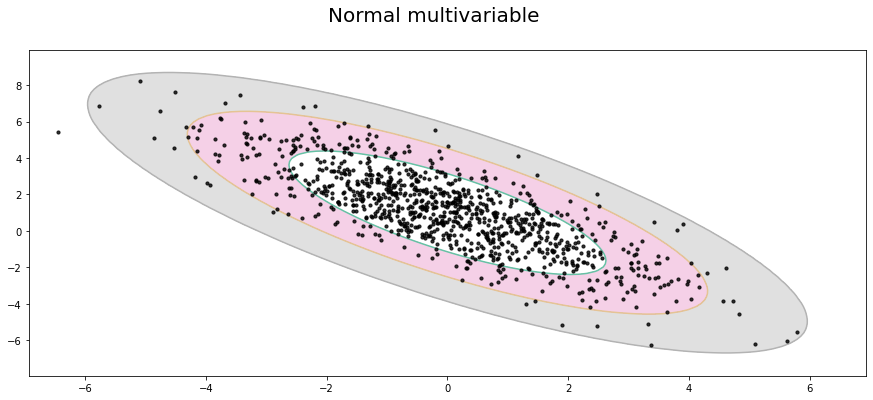

In [27]:
means = [0,1]
Sigma = np.array([
    [3,-3], 
    [-3,5]
])
MN = st.multivariate_normal(mean=means, cov=Sigma)

plot_multinormal(MN)

Volvemos a los datos de peso y consumo de coches:

 - Calculamos la media y la matriz de covarianzas de los datos $(w_i,mpg_i)$:
   - **media muestral del peso**
$$
\mu[W] = \frac{1}{N} \Sigma_{i=1}^N w_i
$$
   - **varianza muestral del peso**:
$$
Var[W] = \frac{1}{N-1} \Sigma_{i=1}^N (w_i - \mu_w)^2
$$
   - **covarianza muestral del peso con el consumo**:
$$
Cov[W,MPG] = \frac{1}{N-1} \Sigma_{i=1}^N (w_i - \mu_w)(mpg_i - \mu_{mpg})
$$

 - Definimos una **normal multivariante** con las mismas medias y covarianzas que los datos.
 - Hacemos una extracción aleatoria de esa normal multivariante: ¿se parece a los datos originales?

<AxesSubplot:xlabel='wt', ylabel='mpg'>

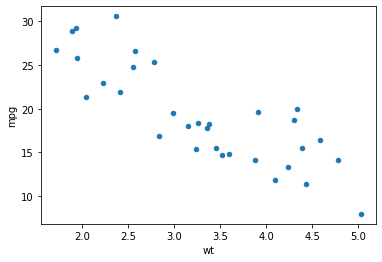

In [28]:
means = mtcars[['wt','mpg']].mean()
Sigma = mtcars[['wt','mpg']].cov()
MN = st.multivariate_normal(mean=means, cov=Sigma)
muestra = MN.rvs(len(mtcars))
df_synt = pd.DataFrame(data = 
        {'wt':muestra[:,0], 'mpg':muestra[:,1]})
df_synt.plot.scatter(x='wt', y='mpg')

Más fino: nos dibujamos las regiones que contienen el [68%, 95%, 99%](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule), pero con los datos de los coches reales:

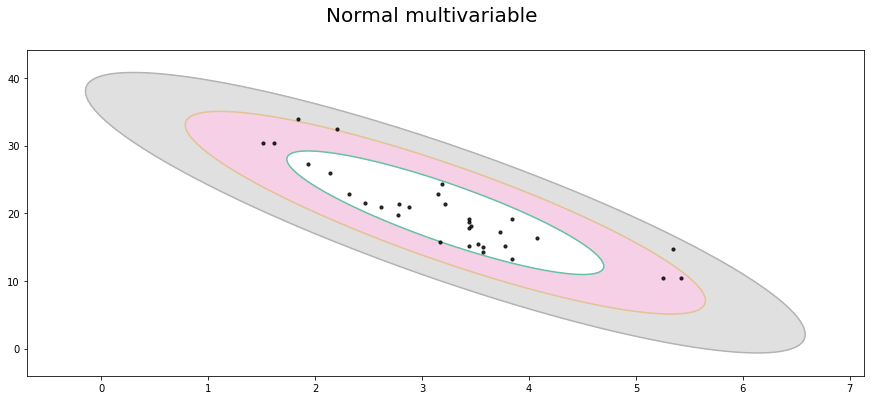

In [29]:
means = mtcars[['wt','mpg']].mean()
Sigma = mtcars[['wt','mpg']].cov()
MN = st.multivariate_normal(mean=means, cov=Sigma)
plot_multinormal(MN, 
                 sample = mtcars[['wt', 'mpg']].values,
                 npoints=200)

## Glosario en inglés

 - **función de densidad conjunta**: *joint density function*
 - **función de densidad marginal**: *marginal density function*
 - **variables aleatorias independientes**: *independent random variables*
 - **covarianza**: *covariance*
 - **correlación**: *correlation*